# **Visualisation des données de patients et des données PCR**

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [156]:
"""
df_patient = pd.read_csv("df_patient_clear_final_f.csv")

df_pcr = pd.read_csv("df_pcr_clean_final.csv")

#Merge two dataframe based on the patient ID key
df_patient_pcr = pd.merge(df_pcr,df_patient,on="patient_id",how="inner")
#We want only the patient who were tested, so we only keep rows where the patient id value exists in both pcr and
#patient dataframe
#Export dataframe to csv
df_patient_pcr.to_csv('df_patient_pcr_clean.csv',index=False)
"""

In [157]:
df = pd.read_csv("df_patient_pcr_clean.csv")
df



,patient_id,pcr,given_name,surname,street_number,address_1,phone_number,address_2,postcode_updated,state_updated,suburb_updated,dob_updated,age_final
0,653091,False,daniel,campbell,58.0,sid barnes crescent,08 38772117,None,4514,qld,north ward,1973,47
1,347667,False,sebastian,mchenry,12.0,mundawari circuit,08 61083524,ocean star villas,4551,qld,swan view,1990,30
2,708481,True,sarah,rellos,20.0,torres street,02 73197286,None,3199,vic,bribie island,1943,77
3,148825,False,chloe,brammy,238.0,fitchett street,02 48826642,None,3280,vic,carnegie,1954,66
4,150081,False,charlie,None,6.0,clark close,03 24096098,talawa,2602,act,south melbourne,1975,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,249457,False,tiffany,loulps,31.0,leal place,0,pangani,4670,qld,forest hill,1976,44
8446,279689,True,daniel,excell,58.0,ratcliffe crescent,02 19648886,None,2170,nsw,lamb island,1984,36
8447,975612,False,jessica,nguyen,10.0,orion place,07 63878836,silverpoint,3429,vic,beecroft,1909,111
8448,884429,True,chelsea,coltman,34.0,pitcairn street,04 68103123,waratana,3224,vic,manly vale,1993,27


## Prévalence de cas positif au sein des états australiens






In [158]:
#Query patients who where tested positively
cases = df.query('pcr == True')


Text(0.5, 1.0, 'Count of PCR Results grouped by states')

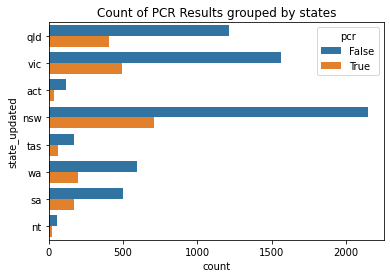

In [159]:

sns.countplot(data=df,y="state_updated",hue="pcr")
plt.title("Count of PCR Results grouped by states")

Text(0.5, 1.0, 'Count of positive PCR grouped by states')

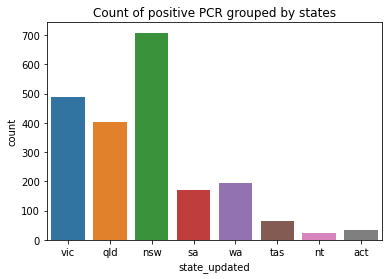

In [160]:
sns.countplot(cases['state_updated'])
plt.title("Count of positive PCR grouped by states")

 Graphiquement on observe que le nombre de cas positifs au sein de l'état **NSW** est supérieure à celui de **NT**, mais cela s'explique par la majorité de la population répartie en **NSW**.

On calcule donc le ratio de test positifs par rapport au total de cas testés par états.

In [161]:
def test_tot(df,state):
    return [i for i in range(len(df)) if df.loc[i,"state_updated"]==state]

In [162]:
test_qld = test_tot(df,"qld")
test_vic = test_tot(df,"vic")
test_act = test_tot(df,"act")
test_nsw = test_tot(df,"nsw")
test_tas = test_tot(df,"tas")
test_wa = test_tot(df,"wa")
test_sa = test_tot(df,"sa")
test_nt = test_tot(df,"nt")


In [163]:
def test_pos(df,test_tot):
    return [i for i in test_tot if df.loc[i,"pcr"]==True]

In [164]:
test_pos_qld= test_pos(df,test_qld)
test_pos_vic= test_pos(df,test_vic)
test_pos_act= test_pos(df,test_act)
test_pos_nsw = test_pos(df,test_nsw)
test_pos_tas = test_pos(df,test_tas)
test_pos_wa = test_pos(df,test_wa)
test_pos_sa = test_pos(df,test_sa)
test_pos_nt = test_pos(df,test_nt)

In [165]:

def percent(test_pos,test_tot):
    return round((len(test_pos)/len(test_tot))*100)

In [166]:
percent_qld = percent(test_pos_qld,test_qld)
percent_vic = percent(test_pos_vic,test_vic)
percent_act = percent(test_pos_act,test_act)
percent_nsw = percent(test_pos_nsw,test_nsw)
percent_tas = percent(test_pos_tas,test_tas)
percent_wa = percent(test_pos_wa,test_wa)
percent_sa = percent(test_pos_sa,test_sa)
percent_nt = percent(test_pos_nt,test_nt)


In [167]:
total_percen = [percent_qld,percent_vic,percent_act,percent_nsw,percent_tas,percent_wa,percent_sa,percent_nt]
states = ["qld","vic","act","nsw","tas","wa","sa","nt"]
dict_percen = dict( zip( states, total_percen))
dict_percen

{'act': 23,
 'nsw': 25,
 'nt': 30,
 'qld': 25,
 'sa': 26,
 'tas': 27,
 'vic': 24,
 'wa': 24}

Text(0.5, 1.0, 'Ratio of positive PCR out of all the PCR tested patients by state')

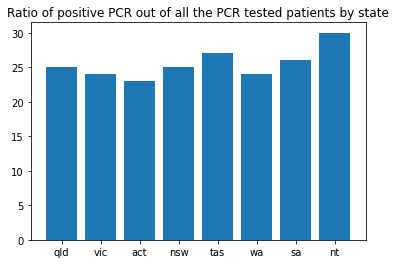

In [168]:
plt.bar(dc.keys(), dict_percen.values())
plt.title("Ratio of positive PCR out of all the PCR tested patients by state")

Le pourcentage dans les états **NT** et  **TAS** de cas positif sont supérieure à ceux de **NSW** malgré un nombre de patients testés inférieures. 


## Prévalence des cas positif au travers des âges


Text(0.5, 1.0, "Repartiton de l'âge des personnes testées")

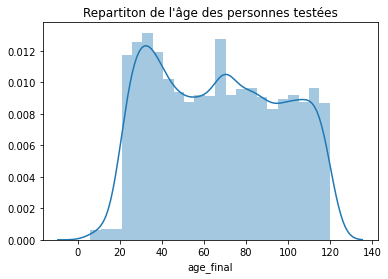

In [169]:

sns.distplot(df['age_final'])
plt.title("Repartiton de l'âge des personnes testées")


Text(0.5, 1.0, "Repartition de l'âge des cas positifs")

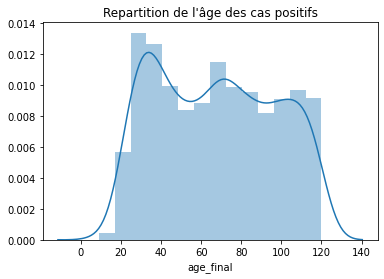

In [170]:
sns.distplot(cases['age_final'])
plt.title("Repartition de l'âge des cas positifs")

## Prévalence des cas positifs en fonction de l'âge et de la répartition gégographique

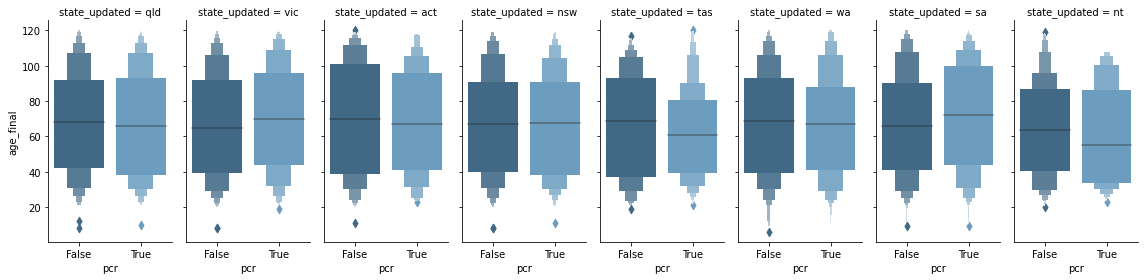

In [171]:
sns.catplot(x="pcr",y="age_final",col="state_updated",data=df,kind="boxen",height=4,aspect=.5,palette="Blues_d")


On modélise par états, la répartition des âges et des résultats au test PCR.



---


La moyenne d'âge des test pour tout les états se situe autour de 70 ans. 
Seul l'état **NT** où le ratio de personnes positives sur le total de personnes testés atteint 30% à une valeur médiane de personnes positives au PCR en dessous de 60 ans. 


---



---

